In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)

In [72]:
#mac한글깨짐...
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


<class 'matplotlib.axes._subplots.AxesSubplot'>


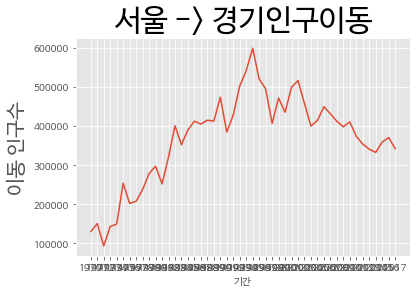

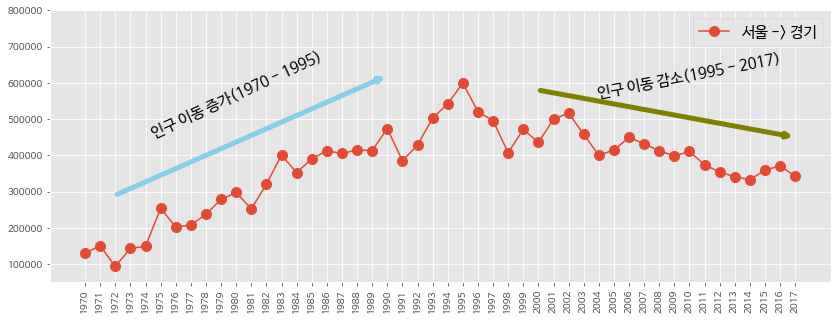

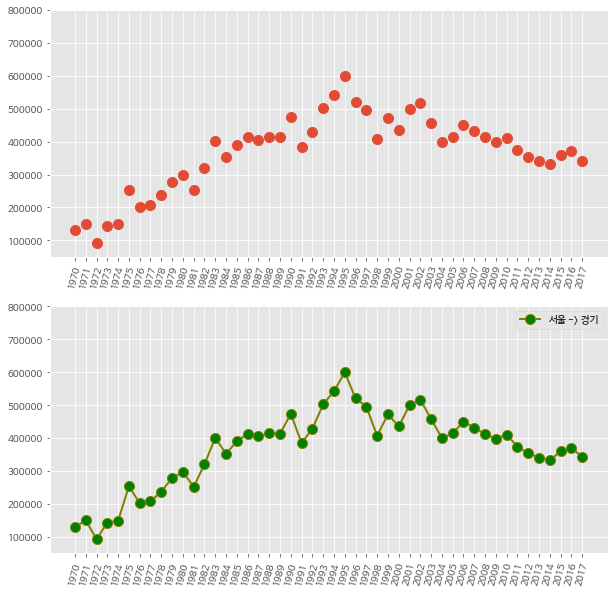

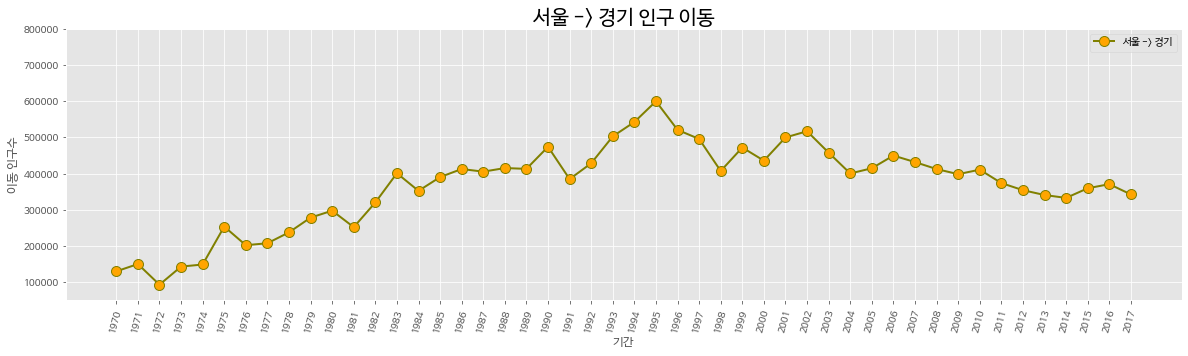

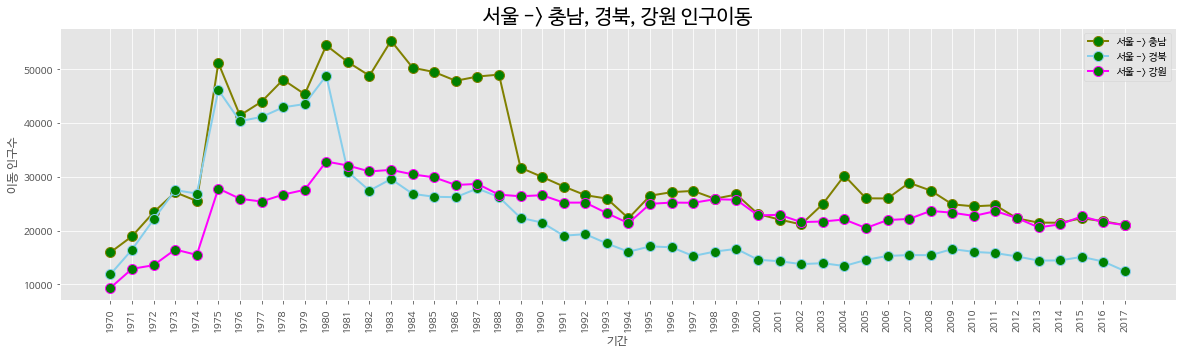

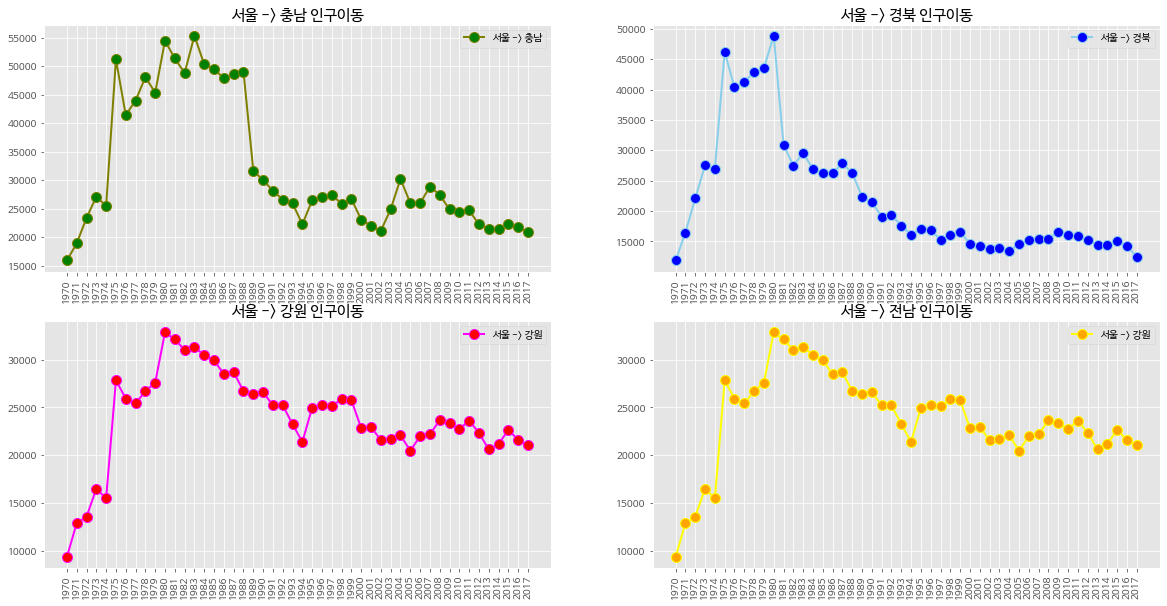

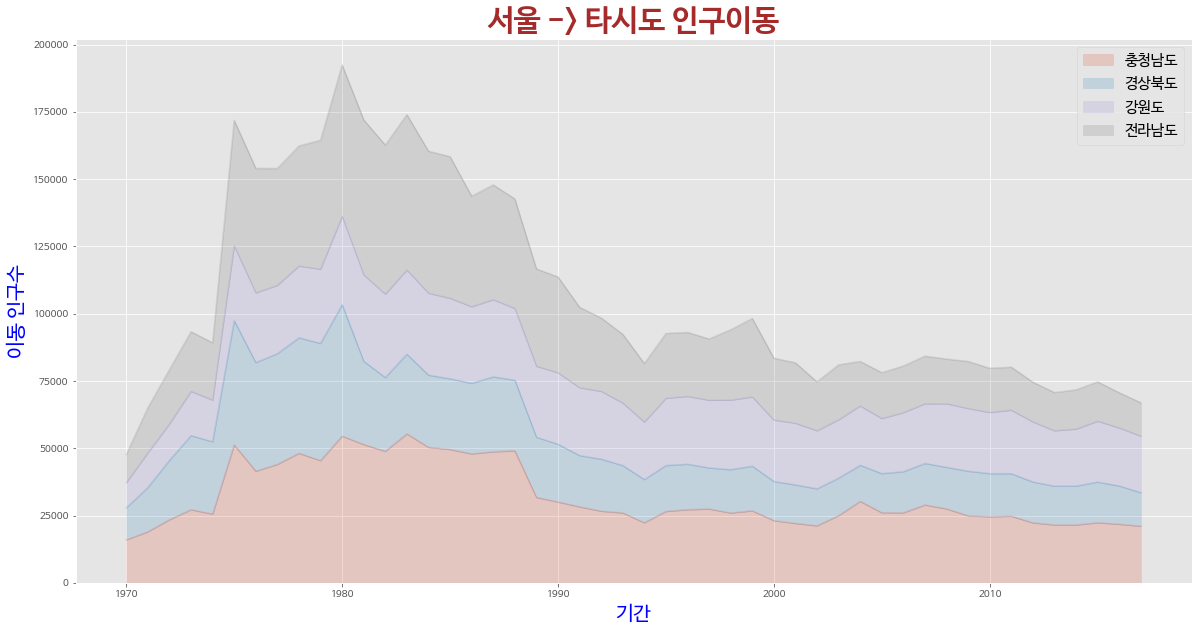

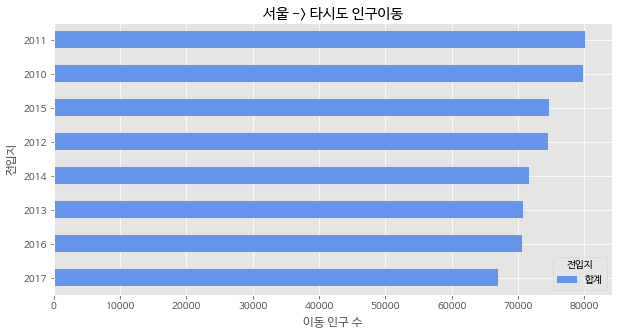

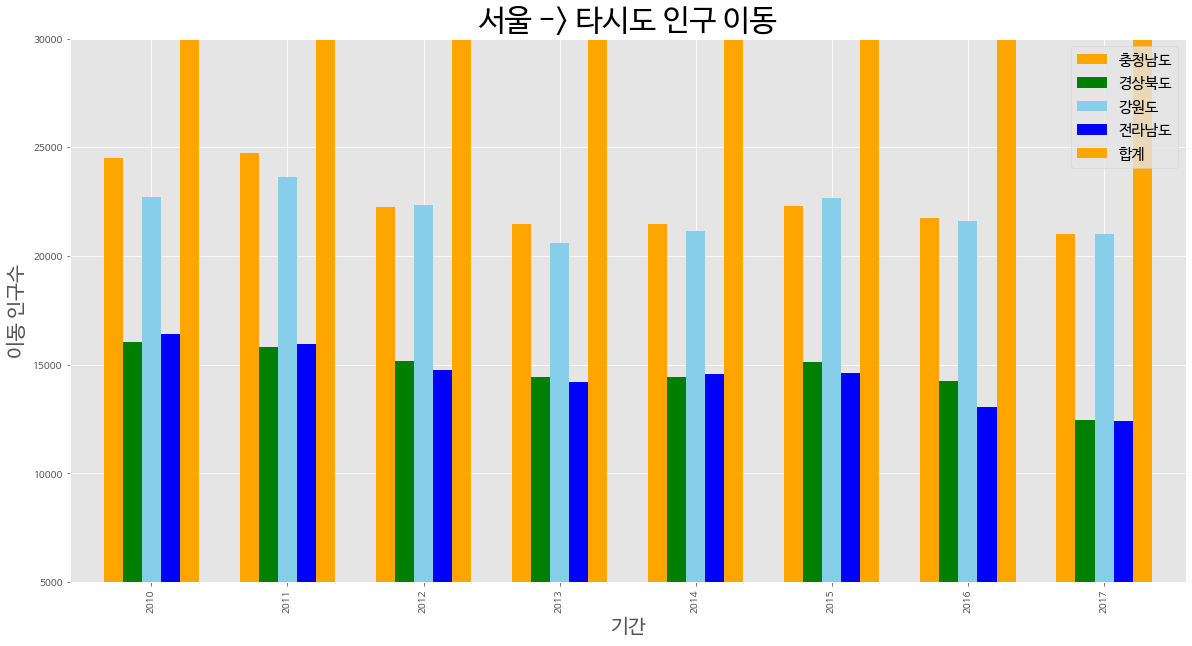

In [42]:
#누락값을 앞 데이터로 채움
df = df.fillna(method = 'ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values)


#차트 제목 추가
plt.title('서울 -> 경기인구이동', size = 30)

plt.xlabel('기간', size = 10)
plt.ylabel('이동 인구수', size = 20)

#plt.show()

from matplotlib import rc


#그림 사이즈 지정

plt.figure(figsize = (14,5))

#x축 눈금 라벨 회전하기
plt.xticks(rotation = 'vertical')

#x,y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10)
plt.legend(labels = ['서울 -> 경기'], loc = 'best',fontsize = 15)

#y축 범위 지정(최소값, 최대값)

plt.ylim(50000, 800000)


plt.annotate('',
             xy = (20, 620000), #화살표 머리(끝점)
             xytext = (2, 290000), #화살표 꼬리(시작점)
             xycoords = 'data', #좌표체계
             arrowprops = dict(arrowstyle= '->', color = 'skyblue', lw = 5), #화살표 서식
             )
#주석표시, 텍스트

plt.annotate('인구 이동 증가(1970 - 1995)',
             xy = (10, 450000),
             rotation = 25,
             va = 'baseline',
             ha = 'center',
             fontsize = 15,)

plt.annotate('',
             xy = (47, 450000), #화살표 머리(끝점)
             xytext = (30, 580000), #화살표 꼬리(시작점)
             xycoords = 'data', #좌표체계
             arrowprops = dict(arrowstyle= '->', color = 'olive', lw = 5), #화살표 서식
             )

plt.annotate('인구 이동 감소(1995 - 2017)',
             xy = (40, 560000),
             rotation = 11,
             va = 'baseline',
             ha = 'center',
             fontsize = 15,)
#plt.show()

#그래프 객체 생성
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

#axe객체에 plot 함수로 그래프 출력

ax1.plot(sr_one, 'o', markersize = 10) #점 찍어서
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10, color = 'olive',
         linewidth = 2, label ='서울 -> 경기') #점과 선 모두 찍음
ax2.legend(loc = 'best')

ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

#plt.show()

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10,
        color = 'olive', linewidth = 2, label = '서울 -> 경기')
ax.legend(loc = 'best')

ax.set_ylim(50000, 800000)

ax.set_title('서울 -> 경기 인구 이동', size = 20)

ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

ax.set_xticklabels(sr_one.index, rotation = 75)

ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
#plt.show()

#서울에서 충청남도, 경상북도, 강원도로 이동한 인구데이터 값만 선택

col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize = (20, 5))
ax  = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')

ax.plot(col_years, df_3.loc['경상북도', :], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'skyblue', linewidth = 2, label = '서울 -> 경북')

ax.plot(col_years, df_3.loc['강원도', :], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'magenta', linewidth = 2, label = '서울 -> 강원')

ax.legend(loc = 'best')

ax.set_title('서울 -> 충남, 경북, 강원 인구이동', size = 20)

#축이름추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

#축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation = 90)

#축 눈금 라벨 크기

ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

#plt.show()

col_years = list(map(str, range(1970, 2018)))

df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'],col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(col_years, df_3.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남')

ax2.plot(col_years, df_3.loc['경상북도', :], marker = 'o', markerfacecolor = 'blue',
        markersize = 10, color = 'skyblue', linewidth = 2, label = '서울 -> 경북')

ax3.plot(col_years, df_3.loc['강원도', :], marker = 'o', markerfacecolor = 'red',
        markersize = 10, color = 'magenta', linewidth = 2, label = '서울 -> 강원')

ax4.plot(col_years, df_3.loc['강원도', :], marker = 'o', markerfacecolor = 'orange',
        markersize = 10, color = 'yellow', linewidth = 2, label = '서울 -> 강원')

#best : 위치 조정
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

ax1.set_title('서울 -> 충남 인구이동', size = 15)
ax2.set_title('서울 -> 경북 인구이동', size = 15)
ax3.set_title('서울 -> 강원 인구이동', size = 15)
ax4.set_title('서울 -> 전남 인구이동', size = 15)

ax1.set_xticklabels(col_years, rotation = 90)
ax2.set_xticklabels(col_years, rotation = 90)
ax3.set_xticklabels(col_years, rotation = 90)
ax4.set_xticklabels(col_years, rotation = 90)

#plt.show()

col_years = list(map(str, range(1970, 2018)))

df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'] , col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형을 변경
df_4.index = df_4.index.map(int)

ax = df_4.plot(kind = 'area', stacked= True, alpha = 0.2, figsize =(20,10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구이동', size = 30, color = 'brown', weight = 'bold')
ax.set_ylabel('이동 인구수', size = 20, color = 'blue')
ax.set_xlabel('기간', size = 20, color = 'blue')
ax.legend(loc = 'best', fontsize = 15)


col_years = list(map(str, range(2010, 2018)))
df_4  = df_seoul.loc[['충청남도', '경상북도', '강원도','전라남도'], col_years]
df_4 = df_4.transpose()

df_4['합계'] = df_4.sum(axis = 1)

df_total = df_4[['합계']].sort_values(by = '합계', ascending = True)

plt.style.use('ggplot')
df_total.plot(kind = 'barh', color ='cornflowerblue', width = 0.5, figsize= (10,5))
plt.title('서울 -> 타시도 인구이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')
plt.show()
df_4.plot(kind = 'bar', figsize = (20,10), width = 0.7, color = ['orange', 'green', 'skyblue','blue'])
plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구수', size = 20)
plt.xlabel('기간', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc = 'best', fontsize = 15)
plt.show()



### 데이터 시각화 후 글자입히기

위아래 세로 졍렬 : center, top, bottom, baseline

좌우방향으로 정렬 : center, left, right

In [24]:
import matplotlib

In [25]:
colors = {}

for name, hex in matplotlib.colors.cnames.items():
  colors[name] = hex
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [29]:
df_4.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017],
           dtype='int64')

In [30]:
col_years

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [38]:
df_4  = df_seoul.loc[['충청남도', '경상북도', '강원도','전라남도'], col_years]
df_4 = df_4.transpose()

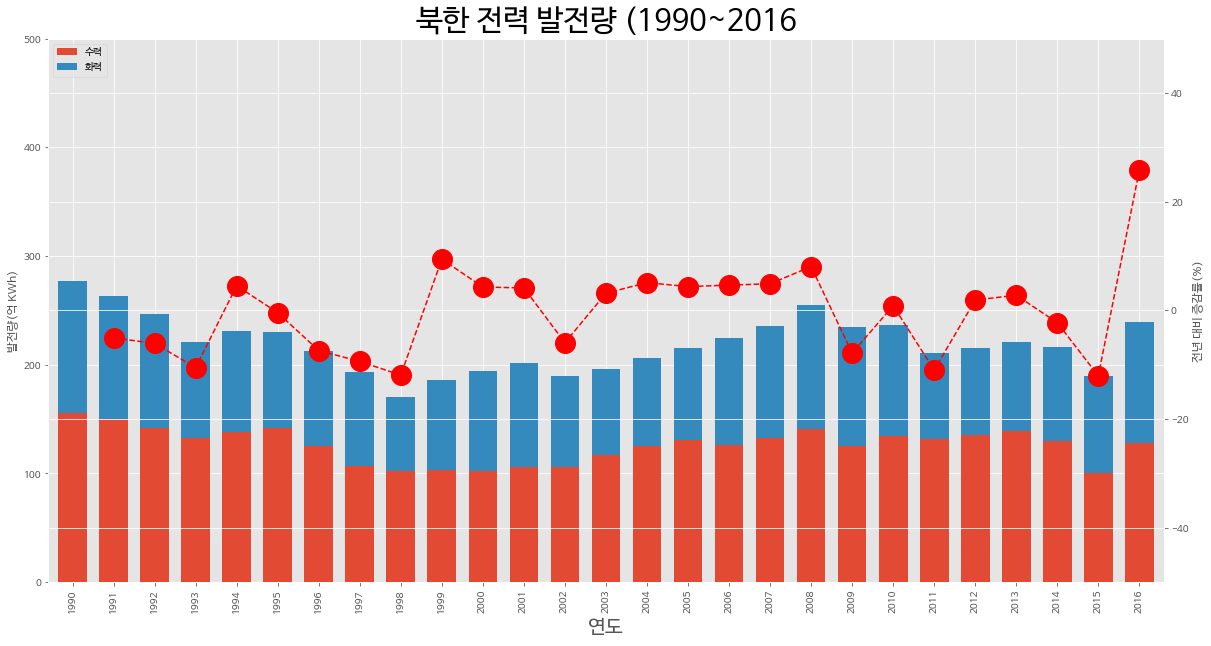

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

plt.style.use('ggplot')
#마이너스 부호 출력
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel('남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)
df = df.loc[5 :9]
df.drop('전력량 (억㎾h)', axis = 'columns', inplace = True)
df.set_index('발전 전력별', inplace = True)
df = df.T

#증감률 계산

df = df.rename(columns = {'합계' : '총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년']) -1 ) *100

#2축 그래프 그리기

ax1 = df[['수력', '화력']].plot(kind = 'bar', figsize = (20,10), width = 0.7, stacked = True)
ax2 = ax1.twinx()

ax2.plot(df.index, df.증감률, ls = '--', marker = 'o', markersize = 20,
         color = 'red', label = '전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size = 20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016', size = 30)
ax1.legend(loc = 'upper left')
plt.show()

In [55]:
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.05415
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.5263
1994,231,138,93,-,221,4.52489


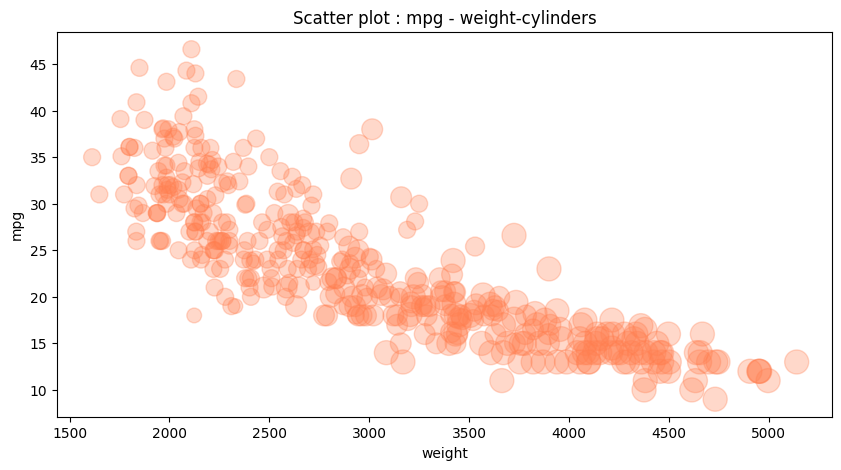

Text(0.5, 1.0, 'Scatter Plot')

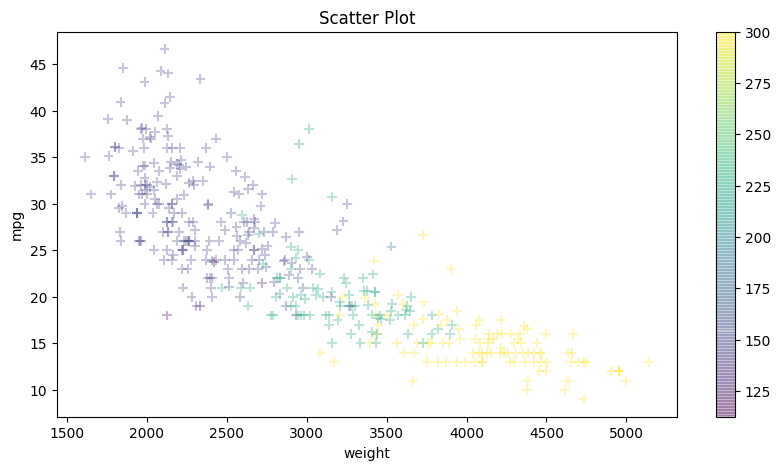

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('auto-mpg.csv', header = None)

df.columns = ['mpg' , 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year', 'origin','name']
cylinders_size = df.cylinders/df.cylinders.max() * 300

df.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s = cylinders_size, alpha = 0.3,figsize = (10,5))
plt.title('Scatter plot : mpg - weight-cylinders')
plt.show()

df.plot(kind = 'scatter', x = 'weight', y = 'mpg', marker = '+', figsize = (10,5), cmap = 'viridis', c = cylinders_size,
        alpha = 0.3, s = 50)

#viridis : 오른쪽 color map, c = cylinders_size는 color 로 구분, s = size
plt.title('Scatter Plot')


           mpg  cylinders  displacement  ...  acceleration  model year  count
origin                                   ...                                 
1       5000.8       1556       61229.5  ...        3743.4       18827    249
2       1952.4        291        7640.0  ...        1175.1        5307     70
3       2405.6        324        8114.0  ...        1277.6        6118     79

[3 rows x 7 columns]


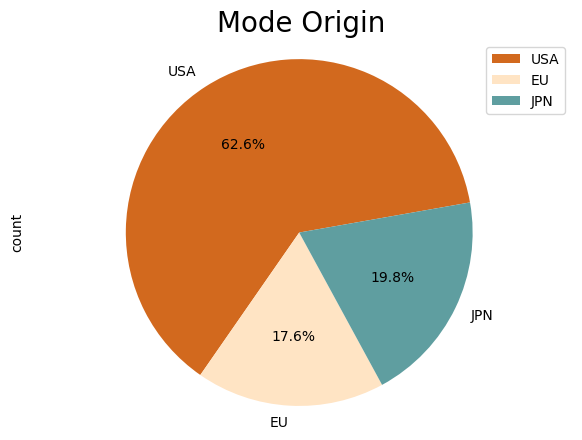

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')
df = pd.read_csv('auto-mpg.csv', header = None)
df.columns = ['mpg' , 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year', 'origin','name']
df['count'] =1
df_origin = df.groupby('origin').sum()
print(df_origin.head())


df_origin.index = ['USA', 'EU','JPN']

df_origin['count'].plot(kind = 'pie',
                        figsize = (7,5),
                        autopct = '%1.1f%%',
                        startangle = 10,
                        colors = ['chocolate', 'bisque', 'cadetblue']
                        )
plt.title('Mode Origin', size = 20)
plt.axis('equal')
plt.legend(labels = df_origin.index, loc = 'upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


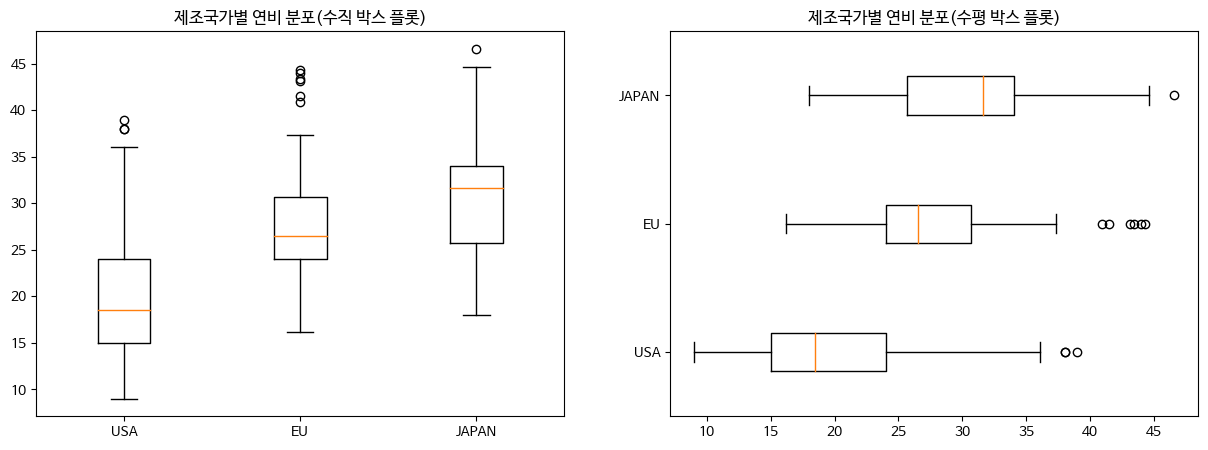

In [73]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x = [df[df['origin'] == 1]['mpg'],
                 df[df['origin'] == 2]['mpg'],
                 df[df['origin'] ==3]['mpg']],
                 labels = ['USA', 'EU', 'JAPAN'])

ax2.boxplot(x = [df[df['origin'] == 1]['mpg'],
                 df[df['origin'] == 2]['mpg'],
                 df[df['origin'] ==3]['mpg']],
                 labels = ['USA', 'EU', 'JAPAN'],
            vert = False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')

ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()